In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
daily = pd.read_csv('../data/call-center-data-v2-daily.csv')
hoo = pd.read_csv('../data/call-center-data-v2-daily-hoo.csv')

In [3]:
daily

,Date,Incoming Calls,Answered Calls,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG)
0,2022-01-01,157,145,12,0:00:15,0:02:29,0:03:12
1,2022-01-02,37,37,0,0:00:03,0:02:06,0:00:35
2,2022-01-03,317,304,13,0:00:18,0:01:35,0:02:37
3,2022-01-04,253,244,9,0:00:13,0:01:50,0:02:02
4,2022-01-05,214,205,9,0:00:10,0:02:10,0:03:22
...,...,...,...,...,...,...,...
1242,2025-05-27,203,195,8,0:00:11,0:02:47,0:01:52
1243,2025-05-28,192,184,8,0:00:07,0:02:50,0:01:56
1244,2025-05-29,212,209,3,0:00:10,0:02:51,0:01:45
1245,2025-05-30,211,203,8,0:00:12,0:03:22,0:03:52


In [4]:
hoo

,Date,Incoming Calls,Answered Calls,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG)
0,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-03,317.0,304.0,13.0,0:00:18,0:01:35,0:02:37
3,2022-01-04,253.0,244.0,9.0,0:00:13,0:01:50,0:02:02
4,2022-01-05,214.0,205.0,9.0,0:00:10,0:02:10,0:03:22
...,...,...,...,...,...,...,...
1242,2025-05-27,203.0,195.0,8.0,0:00:11,0:02:47,0:01:52
1243,2025-05-28,192.0,184.0,8.0,0:00:07,0:02:50,0:01:56
1244,2025-05-29,212.0,209.0,3.0,0:00:10,0:02:51,0:01:45
1245,2025-05-30,211.0,203.0,8.0,0:00:12,0:03:22,0:03:52


## Data Cleaning

In [5]:
# Convert 'Date' to datetime
daily['Date'] = pd.to_datetime(daily['Date'])
hoo['Date'] = pd.to_datetime(hoo['Date'])

# Convert time-string columns to total seconds
for col in ['Answer Speed (AVG)', 'Talk Duration (AVG)', 'Waiting Time (AVG)']:
    daily[col] = pd.to_timedelta(daily[col]).dt.total_seconds()
    hoo[col] = pd.to_timedelta(hoo[col]).dt.total_seconds()

# Extract the day of week: Monday=0, Sunday=6
daily['Day Of Week'] = daily['Date'].dt.dayofweek
hoo['Day Of Week'] = hoo['Date'].dt.dayofweek

In [6]:
# Identify missing values (NaN) in the hoo dataset's 'Incoming Calls'.
# .isna() returns True/False. .astype(int) converts True to 1, False to 0.
hoo['Is Non Operational'] = hoo['Incoming Calls'].isna().astype(int)

# Merge the 'Is_Non_Operational' column from 'hoo' into 'daily' using the Date index.
daily = daily.merge(
    # Select only the two necessary columns from hoo: the key and the new flag
    hoo[['Date', 'Is Non Operational']], 
    on='Date',
    how='left'
)

In [7]:
# Calculate Abandonment Rate
daily['Abandonment Rate (%)'] = np.where(
    daily['Incoming Calls'] > 0,
    (daily['Abandoned Calls'] / daily['Incoming Calls']) * 100,
    0
)

In [8]:
daily = daily.sort_values('Date')
daily = daily.set_index('Date')

In [9]:
daily

,Incoming Calls,Answered Calls,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Day Of Week,Is Non Operational,Abandonment Rate (%)
Date,,,,,,,,,
2022-01-01,157,145,12,15.0,149.0,192.0,5,1,7.643312
2022-01-02,37,37,0,3.0,126.0,35.0,6,1,0.000000
2022-01-03,317,304,13,18.0,95.0,157.0,0,0,4.100946
2022-01-04,253,244,9,13.0,110.0,122.0,1,0,3.557312
2022-01-05,214,205,9,10.0,130.0,202.0,2,0,4.205607
...,...,...,...,...,...,...,...,...,...
2025-05-27,203,195,8,11.0,167.0,112.0,1,0,3.940887
2025-05-28,192,184,8,7.0,170.0,116.0,2,0,4.166667
2025-05-29,212,209,3,10.0,171.0,105.0,3,0,1.415094


## Target Variables

### Incoming Calls

Incoming Calls Summary Statistics:
count    1247.000000
mean      202.635926
std       166.241066
min         5.000000
25%       124.000000
50%       179.000000
75%       236.000000
max      1715.000000


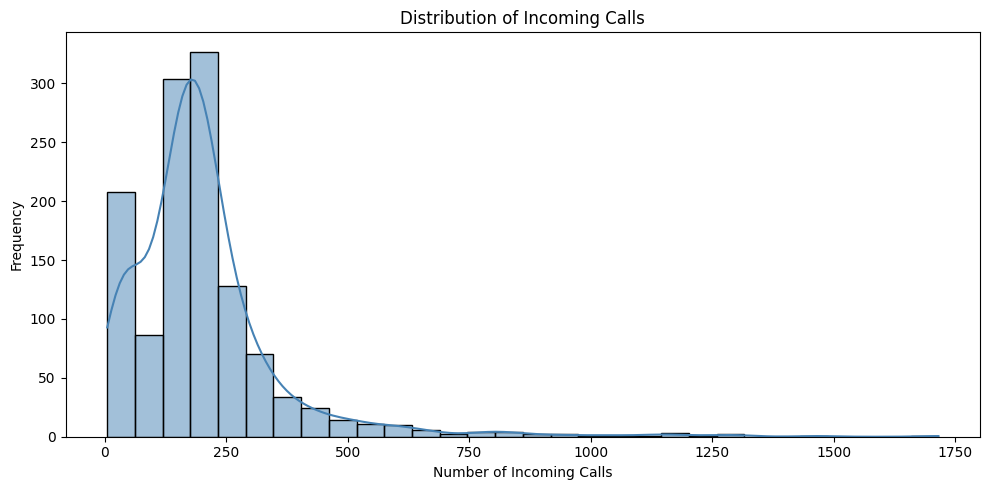


 Top 5 Highest Incoming Call Days:
            Incoming Calls
Date                      
2024-04-15            1715
2024-04-16            1463
2024-04-26            1308
2024-05-30            1291
2024-06-28            1247

 Bottom 5 Lowest Incoming Call Days:
            Incoming Calls
Date                      
2022-09-17               5
2023-09-07               5
2024-08-27               7
2025-03-30               7
2023-03-19              11


In [10]:
# --- Summary Statistics ---
print("Incoming Calls Summary Statistics:")
print(daily['Incoming Calls'].describe().to_string())

# --- Distribution Plot ---
plt.figure(figsize=(10, 5))
sns.histplot(daily['Incoming Calls'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of Incoming Calls')
plt.xlabel('Number of Incoming Calls')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# --- Top & Bottom Days ---
top_days = daily.sort_values(by='Incoming Calls', ascending=False).head(5)
bottom_days = daily.sort_values(by='Incoming Calls', ascending=True).head(5)

print("\n Top 5 Highest Incoming Call Days:")
print(top_days[['Incoming Calls']])

print("\n Bottom 5 Lowest Incoming Call Days:")
print(bottom_days[['Incoming Calls']])


### Talk Duration

Talk Duration (AVG) Summary Statistics:
count    1247.000000
mean      157.603047
std        23.716533
min        57.000000
25%       142.000000
50%       157.000000
75%       171.000000
max       288.000000


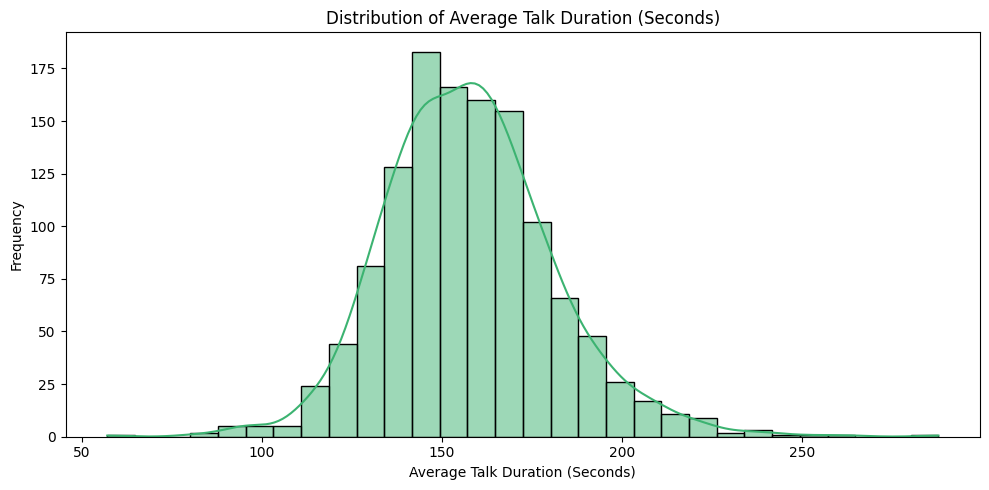


 Top 5 Highest Average Talk Duration Days:
            Talk Duration (AVG)
Date                           
2024-08-27                288.0
2024-03-10                263.0
2024-03-08                253.0
2024-03-11                243.0
2023-07-23                241.0

 Bottom 5 Lowest Average Talk Duration Days:
            Talk Duration (AVG)
Date                           
2022-07-01                 57.0
2022-07-02                 81.0
2022-08-26                 85.0
2024-09-29                 91.0
2023-02-07                 94.0


In [11]:
# --- Summary Statistics ---
print("Talk Duration (AVG) Summary Statistics:")
print(daily['Talk Duration (AVG)'].describe().to_string())

# --- Distribution Plot ---
plt.figure(figsize=(10, 5))
sns.histplot(daily['Talk Duration (AVG)'], bins=30, kde=True, color='mediumseagreen')
plt.title('Distribution of Average Talk Duration (Seconds)')
plt.xlabel('Average Talk Duration (Seconds)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# --- Top & Bottom Days ---
top_days = daily.sort_values(by='Talk Duration (AVG)', ascending=False).head(5)
bottom_days = daily.sort_values(by='Talk Duration (AVG)', ascending=True).head(5)

print("\n Top 5 Highest Average Talk Duration Days:")
print(top_days[['Talk Duration (AVG)']])

print("\n Bottom 5 Lowest Average Talk Duration Days:")
print(bottom_days[['Talk Duration (AVG)']])


## Call Volumn

### Trends Over Time

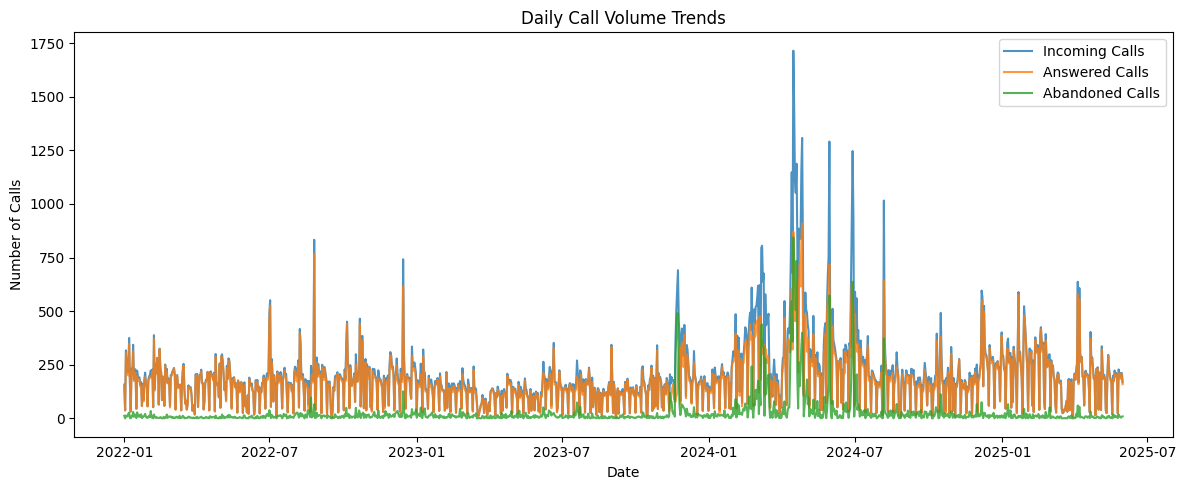

C:\Users\sarah\AppData\Local\Temp\ipykernel_40948\1552687563.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily.resample('M')[['Incoming Calls', 'Answered Calls', 'Abandoned Calls']]


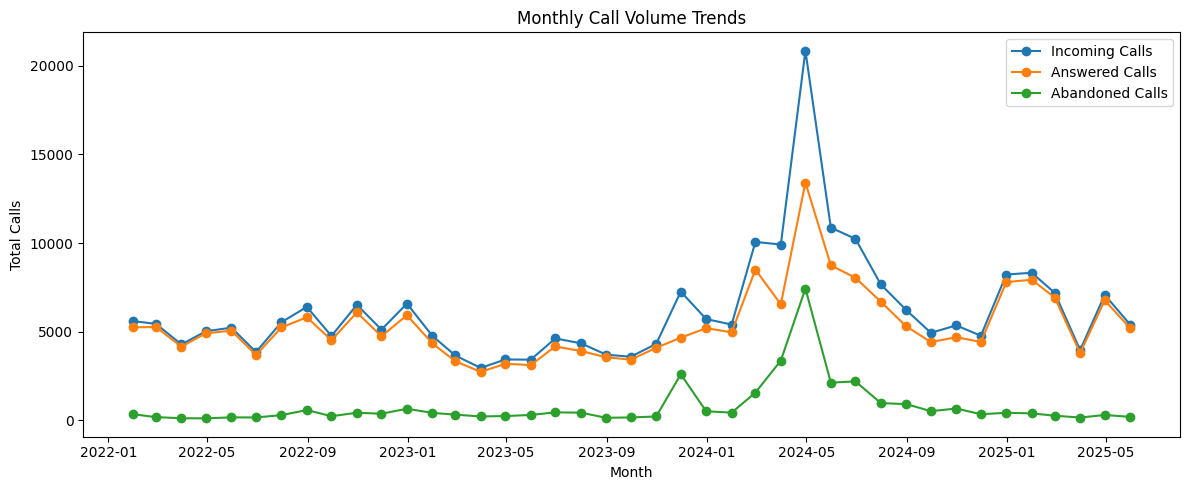

In [12]:
# Plot Call Volume Trends Over Time (Daily)
plt.figure(figsize=(12, 5))
plt.plot(daily.index, daily['Incoming Calls'], label='Incoming Calls', alpha=0.8)
plt.plot(daily.index, daily['Answered Calls'], label='Answered Calls', alpha=0.8)
plt.plot(daily.index, daily['Abandoned Calls'], label='Abandoned Calls', alpha=0.8)
plt.title('Daily Call Volume Trends')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.legend()
plt.tight_layout()
plt.show()

# Group data by month
monthly_calls = (
    daily.resample('M')[['Incoming Calls', 'Answered Calls', 'Abandoned Calls']]
    .sum(numeric_only=True)
)

# Plot monthly totals
plt.figure(figsize=(12, 5))
plt.plot(monthly_calls.index, monthly_calls['Incoming Calls'], marker='o', label='Incoming Calls')
plt.plot(monthly_calls.index, monthly_calls['Answered Calls'], marker='o', label='Answered Calls')
plt.plot(monthly_calls.index, monthly_calls['Abandoned Calls'], marker='o', label='Abandoned Calls')
plt.title('Monthly Call Volume Trends')
plt.xlabel('Month')
plt.ylabel('Total Calls')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
daily.sort_values(by='Incoming Calls', ascending=False).head(10)

,Incoming Calls,Answered Calls,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Day Of Week,Is Non Operational,Abandonment Rate (%)
Date,,,,,,,,,
2024-04-15,1715,871,844,92.0,153.0,1365.0,0,0,49.212828
2024-04-16,1463,775,688,106.0,190.0,953.0,1,0,47.026658
2024-04-26,1308,909,399,83.0,184.0,671.0,4,0,30.504587
2024-05-30,1291,718,573,112.0,189.0,666.0,3,0,44.384198
2024-06-28,1247,610,637,106.0,192.0,1551.0,4,0,51.082598
2024-04-19,1188,453,735,304.0,219.0,1357.0,4,0,61.868687
2024-04-25,1155,823,332,68.0,198.0,931.0,3,0,28.744589
2024-04-13,1148,602,546,104.0,153.0,744.0,5,0,47.560976
2024-04-17,1108,454,654,168.0,194.0,804.0,2,0,59.025271


C:\Users\sarah\AppData\Local\Temp\ipykernel_40948\2078221945.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


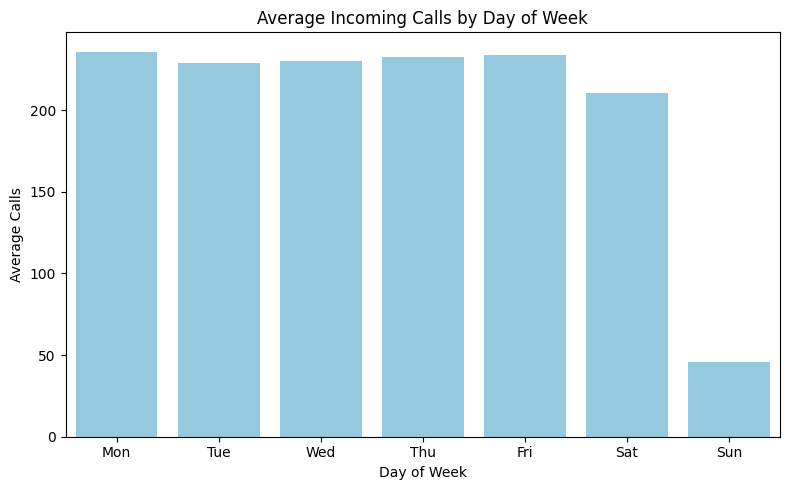

In [14]:
# Map numeric day of week to weekday names
day_names = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
daily['Day Name'] = daily['Day Of Week'].map(day_names)

# Plot Average Number of Incoming Calls by Day of Week
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Day Name', 
    y='Incoming Calls', 
    data=daily, 
    estimator='mean', 
    order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
    ci=None,
    color='skyblue'
)
plt.title('Average Incoming Calls by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Calls')
plt.tight_layout()
plt.show()

## Service Metrics

### Distributions

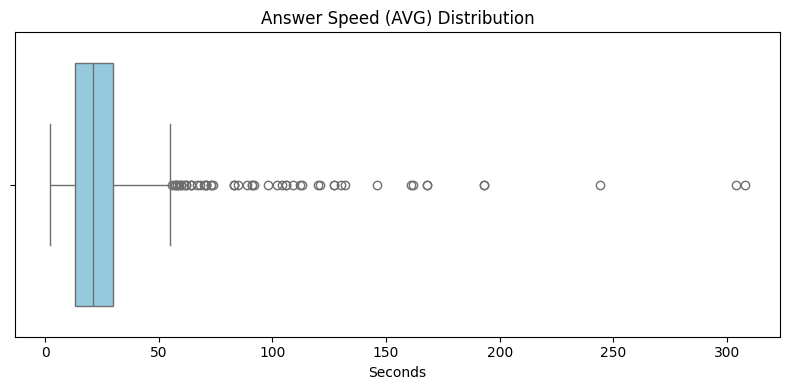

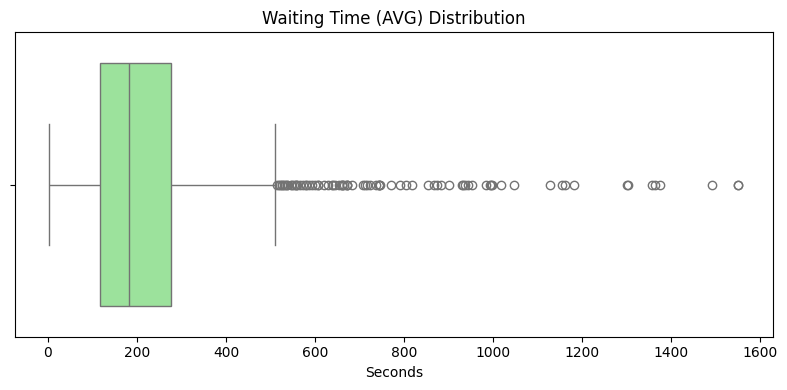

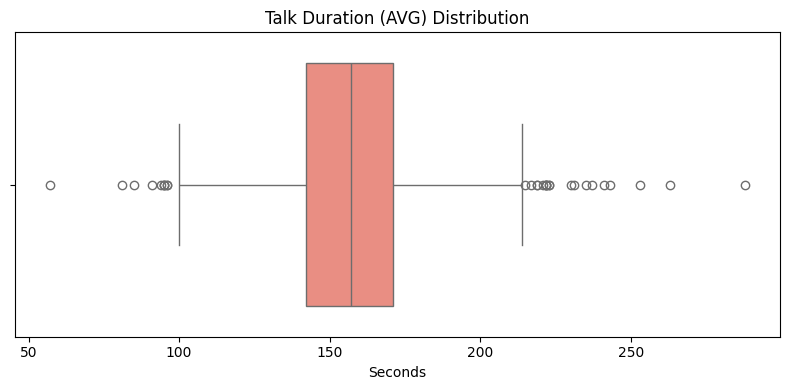

In [15]:
# --- Answer Speed Boxplot ---
plt.figure(figsize=(8, 4))
sns.boxplot(x=daily['Answer Speed (AVG)'], color='skyblue')
plt.title('Answer Speed (AVG) Distribution')
plt.xlabel('Seconds')
plt.tight_layout()
plt.show()

# --- Waiting Time Boxplot ---
plt.figure(figsize=(8, 4))
sns.boxplot(x=daily['Waiting Time (AVG)'], color='lightgreen')
plt.title('Waiting Time (AVG) Distribution')
plt.xlabel('Seconds')
plt.tight_layout()
plt.show()

# --- Talk Duration Boxplot ---
plt.figure(figsize=(8, 4))
sns.boxplot(x=daily['Talk Duration (AVG)'], color='salmon')
plt.title('Talk Duration (AVG) Distribution')
plt.xlabel('Seconds')
plt.tight_layout()
plt.show()

### Abandonment Rate Over Time

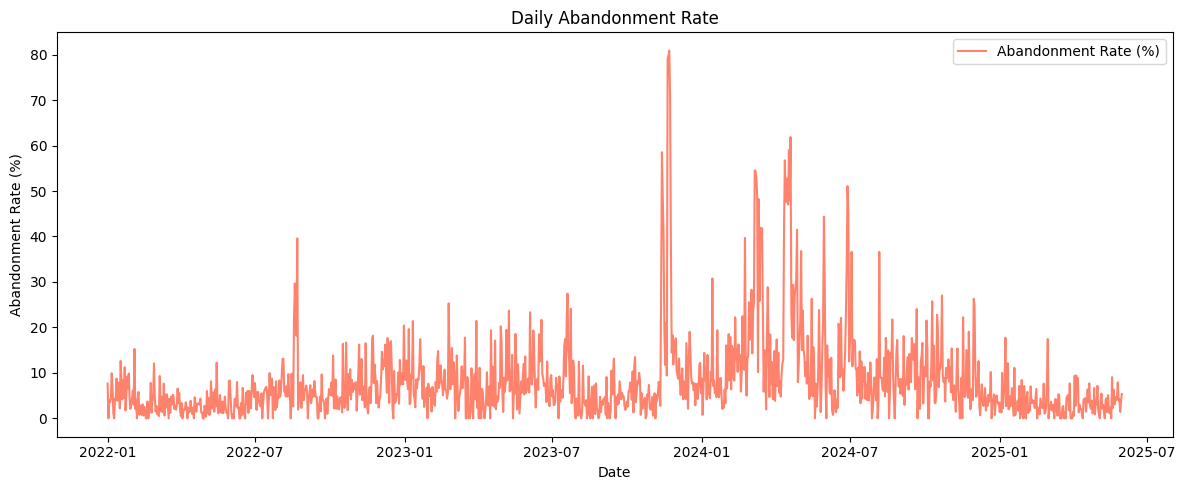

C:\Users\sarah\AppData\Local\Temp\ipykernel_40948\3601823316.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_abandonment = daily['Abandonment Rate (%)'].resample('M').mean()


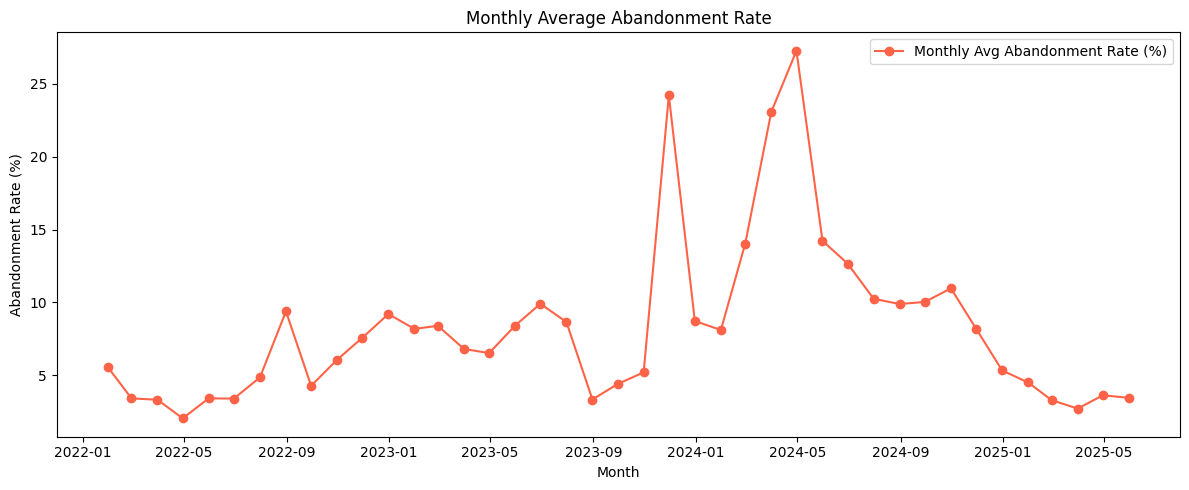

In [16]:
# --- Daily Abandonment Rate ---
plt.figure(figsize=(12, 5))
plt.plot(daily.index, daily['Abandonment Rate (%)'], label='Abandonment Rate (%)', alpha=0.8, color='tomato')
plt.title('Daily Abandonment Rate')
plt.xlabel('Date')
plt.ylabel('Abandonment Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()

# --- Monthly Average Abandonment Rate ---
monthly_abandonment = daily['Abandonment Rate (%)'].resample('M').mean()

plt.figure(figsize=(12, 5))
plt.plot(monthly_abandonment.index, monthly_abandonment, marker='o', label='Monthly Avg Abandonment Rate (%)', color='tomato')
plt.title('Monthly Average Abandonment Rate')
plt.xlabel('Month')
plt.ylabel('Abandonment Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()


## Correlation

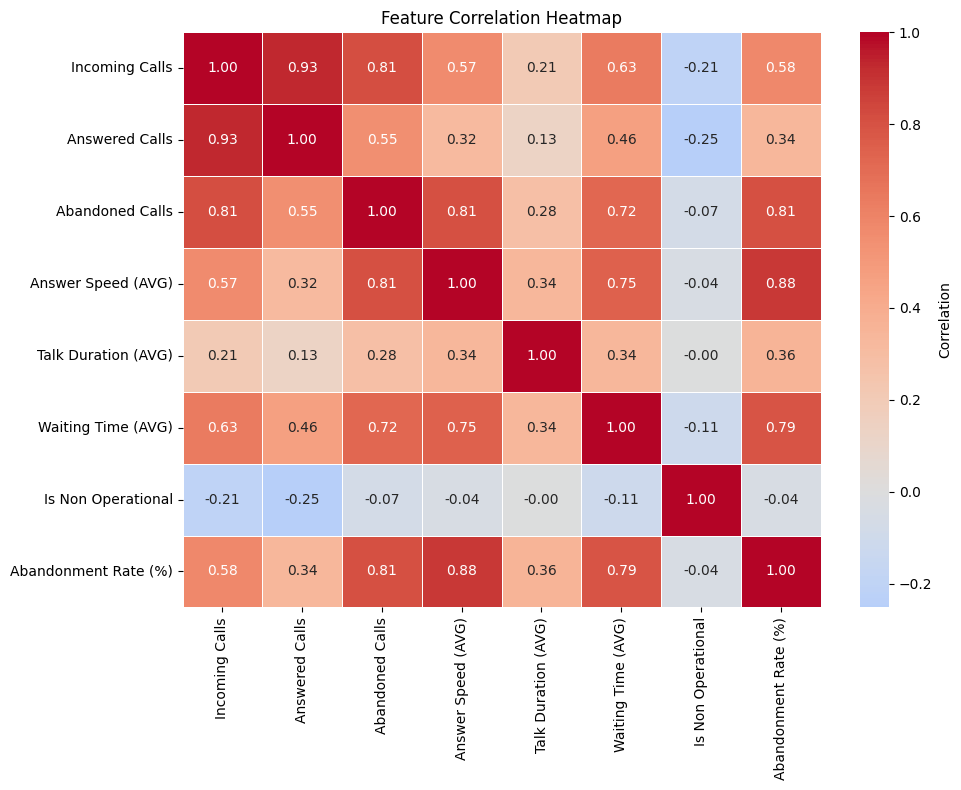

In [17]:
# Select numeric columns relevant for correlation
numeric_cols = [
    'Incoming Calls', 'Answered Calls', 'Abandoned Calls',
    'Answer Speed (AVG)', 'Talk Duration (AVG)', 'Waiting Time (AVG)',
    'Is Non Operational', 'Abandonment Rate (%)'
]

# Compute correlation matrix
corr_matrix = daily[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,           # Show correlation values
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'}
)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


Correlations matches the intuition that average answer speed and waiting time are strong predictors of a high abandonment rate. Reducing wait time is the key to improving service level.

## Segmentation

In [18]:
summary = daily.groupby('Is Non Operational')[[
    'Incoming Calls', 'Answered Calls', 'Abandoned Calls',
    'Answer Speed (AVG)', 'Talk Duration (AVG)', 'Waiting Time (AVG)',
    'Abandonment Rate (%)'
]].mean().round(2)

summary.index = ['Operational', 'Non-Operational']
summary

,Incoming Calls,Answered Calls,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Abandonment Rate (%)
Operational,220.16,191.73,28.42,25.42,157.61,242.56,8.38
Non-Operational,134.80,119.65,15.16,23.02,157.59,192.90,7.54


### High Volume vs Low Volume Days

In [19]:
# Define top 25% and bottom 25% thresholds for Incoming Calls
q75 = daily['Incoming Calls'].quantile(0.75)
q25 = daily['Incoming Calls'].quantile(0.25)

daily['Volume Segment'] = 'Medium'
daily.loc[daily['Incoming Calls'] >= q75, 'Volume Segment'] = 'High'
daily.loc[daily['Incoming Calls'] <= q25, 'Volume Segment'] = 'Low'

# Ensure order: Low, Medium, High
order = ['Low', 'Medium', 'High']
ops_metrics = ['Incoming Calls', 'Answered Calls', 'Abandoned Calls', 'Abandonment Rate (%)']
volume_grouped = daily.groupby('Volume Segment')[ops_metrics].mean().reindex(order)

print("\nAverage Metrics by Volume Segment")
volume_grouped


Average Metrics by Volume Segment


,Incoming Calls,Answered Calls,Abandoned Calls,Abandonment Rate (%)
Volume Segment,,,,
Low,57.253968,53.993651,3.260317,5.461920
Medium,179.056726,166.700162,12.356564,6.831309
High,394.203175,319.926984,74.276190,13.658140


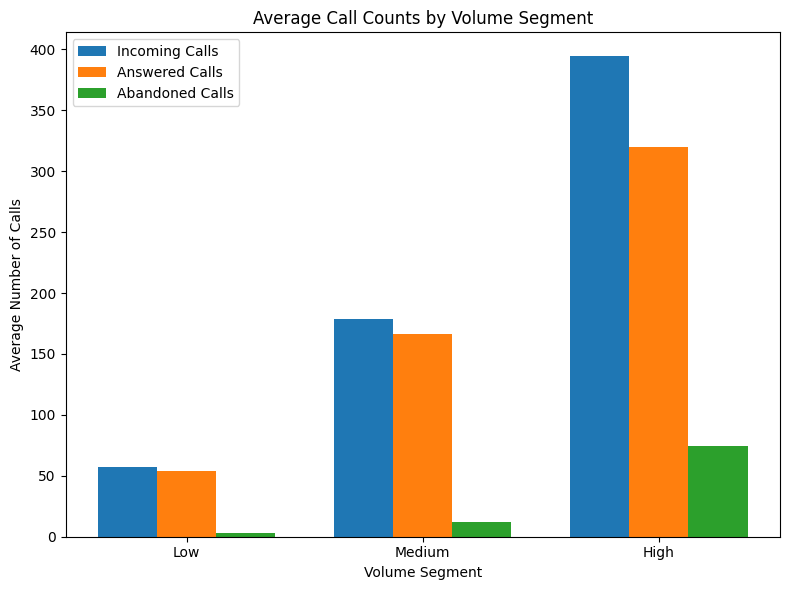

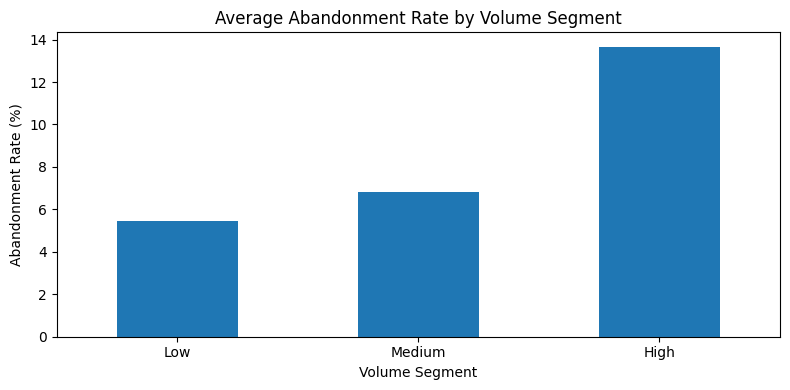

In [20]:
# Grouped Bar Chart for Call Counts
metrics = ['Incoming Calls', 'Answered Calls', 'Abandoned Calls']
plot_data = volume_grouped[metrics]

x = np.arange(len(plot_data))  # Low, Medium, High
width = 0.25  # width of each bar

plt.figure(figsize=(8, 6))
for i, col in enumerate(metrics):
    plt.bar(x + i*width - width, plot_data[col], width=width, label=col)

plt.xticks(x, plot_data.index)  # Low, Medium, High
plt.xlabel('Volume Segment')
plt.ylabel('Average Number of Calls')
plt.title('Average Call Counts by Volume Segment')
plt.legend()
plt.tight_layout()
plt.show()

# Bar Chart for Abandonment Rate
abandon_rate = volume_grouped['Abandonment Rate (%)']

plt.figure(figsize=(8, 4))
abandon_rate.plot(kind='bar')
plt.title('Average Abandonment Rate by Volume Segment')
plt.xlabel('Volume Segment')
plt.ylabel('Abandonment Rate (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Key Observations

- High-volume days see higher abandonment rates, likely due to increase of service metrics (Answer Speed, Talk Duration, Waiting Time).
- A few days have unusually high call volumes or wait times, which may impact forecasting.
- Moderately strong correlation between Incoming Calls and Waiting Time / Abandonment Rate.

## April May Focus

In [21]:
daily[daily.index.month.isin([4, 5])]

,Incoming Calls,Answered Calls,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Day Of Week,Is Non Operational,Abandonment Rate (%),Day Name,Volume Segment
Date,,,,,,,,,,,
2022-04-01,194,193,1,11.0,117.0,94.0,4,0,0.515464,Fri,Medium
2022-04-02,207,200,7,10.0,128.0,120.0,5,0,3.381643,Sat,Medium
2022-04-03,53,53,0,18.0,128.0,130.0,6,0,0.000000,Sun,Low
2022-04-04,147,145,2,9.0,110.0,84.0,0,0,1.360544,Mon,Medium
2022-04-05,201,197,4,9.0,119.0,143.0,1,0,1.990050,Tue,Medium
...,...,...,...,...,...,...,...,...,...,...,...
2025-05-27,203,195,8,11.0,167.0,112.0,1,0,3.940887,Tue,Medium
2025-05-28,192,184,8,7.0,170.0,116.0,2,0,4.166667,Wed,Medium
2025-05-29,212,209,3,10.0,171.0,105.0,3,0,1.415094,Thu,Medium


C:\Users\sarah\AppData\Local\Temp\ipykernel_40948\3119017556.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Year'] = subset.index.year
C:\Users\sarah\AppData\Local\Temp\ipykernel_40948\3119017556.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['MonthDay'] = subset.index.strftime('%m-%d')


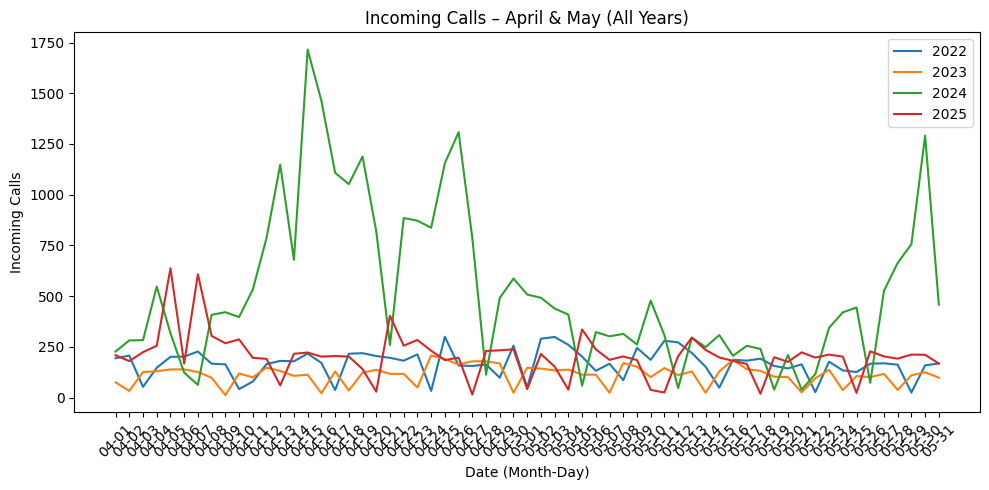

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

subset = daily[daily.index.month.isin([4, 5])]

# add columns for year and day of year (or day within Apr–May)
subset['Year'] = subset.index.year
subset['MonthDay'] = subset.index.strftime('%m-%d')

# plot each year separately
plt.figure(figsize=(10, 5))
for year, data in subset.groupby('Year'):
    plt.plot(data['MonthDay'], data['Incoming Calls'], label=year)

plt.title('Incoming Calls – April & May (All Years)')
plt.xlabel('Date (Month-Day)')
plt.ylabel('Incoming Calls')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


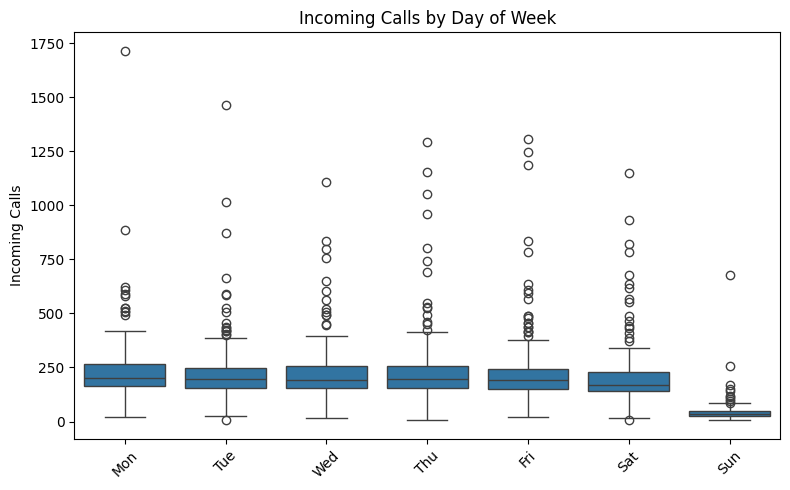

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Day Name', y='Incoming Calls', data=daily,
            order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Incoming Calls by Day of Week')
plt.ylabel('Incoming Calls')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


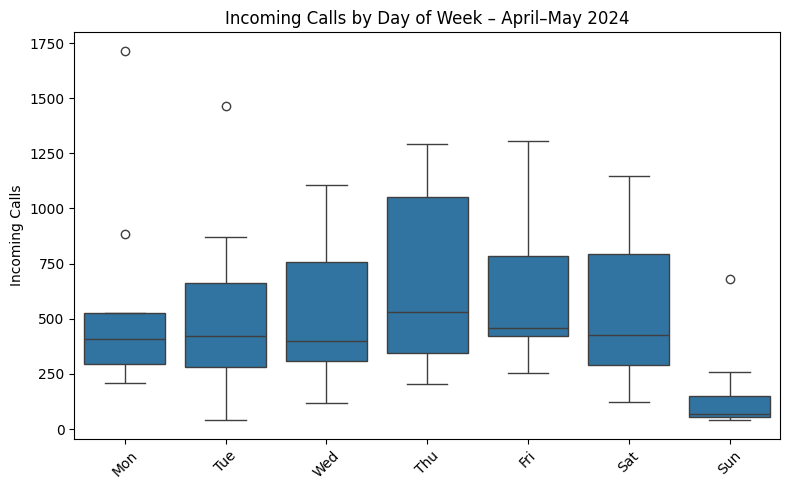

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

subset = daily.loc['2024-04-01':'2024-05-31'].copy()
plt.figure(figsize=(8, 5))
sns.boxplot(x='Day Name', y='Incoming Calls', data=subset,
            order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Incoming Calls by Day of Week – April–May 2024')
plt.ylabel('Incoming Calls')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


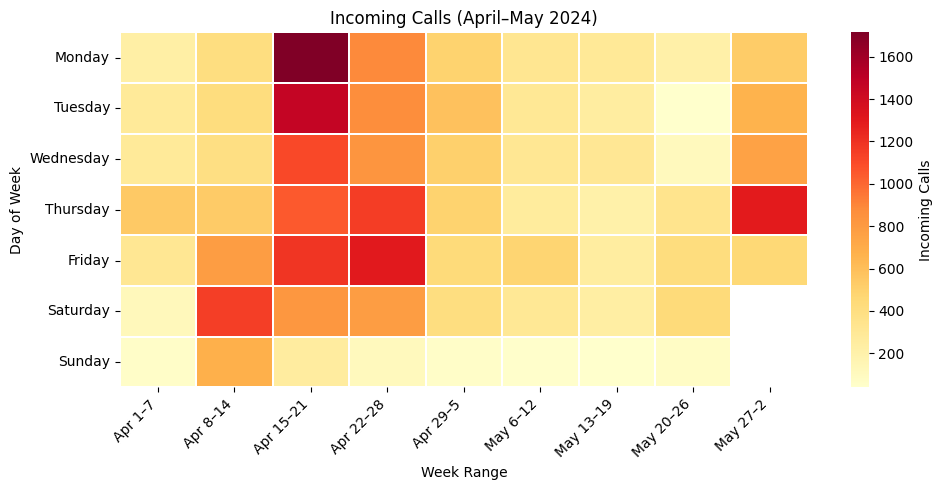

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import numpy as np

# ensure datetime index
daily.index = pd.to_datetime(daily.index)

# filter April–May 2024
subset = daily.loc['2024-04-01':'2024-05-31'].copy()

# compute day of week and week group starting from Apr 1
subset['Weekday'] = subset.index.dayofweek
start_date = subset.index.min()
subset['WeekGroup'] = ((subset.index - start_date).days // 7) + 1

# label each group like "Apr 1–7" (cross-platform safe)
week_labels = []
for week_num in sorted(subset['WeekGroup'].unique()):
    week_start = start_date + pd.Timedelta(days=(week_num - 1) * 7)
    week_end = week_start + pd.Timedelta(days=6)
    # use .day instead of %-d
    label = f"{week_start.strftime('%b')} {week_start.day}–{week_end.day}"
    week_labels.append(label)

# pivot for heatmap
pivot = subset.pivot(index='Weekday', columns='WeekGroup', values='Incoming Calls')

# plot
plt.figure(figsize=(10, 5))
sns.heatmap(
    pivot,
    cmap='YlOrRd',
    cbar_kws={'label': 'Incoming Calls'},
    linewidths=0.3,
    linecolor='white'
)

# customize labels
plt.title('Incoming Calls (April–May 2024)')
plt.yticks(
    ticks=np.arange(7) + 0.5,
    labels=[calendar.day_name[i] for i in range(7)],
    rotation=0
)
plt.xticks(
    ticks=np.arange(len(week_labels)) + 0.5,
    labels=week_labels,
    rotation=45,
    ha='right'
)
plt.xlabel('Week Range')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()
